# Havi Random

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline  
loca_path = './'

### Reading the DC Volume and Items data

In [2]:
DC_Volume = pd.read_excel(loca_path+"START HERE_DC Volumes with Case Attributes.xlsx")
items = pd.read_excel(loca_path+"START HERE_DC Volumes with Case Attributes.xlsx", sheetname=1)

In [3]:
items.head()

,Wrin Prefix,D,F,R,Rank
0,00004-FRENCH FRIES,NaN,2176482.0,NaN,1.0
1,00407-CHICKEN NUGGETS,NaN,757977.0,NaN,2.0
2,00005-10/1 BEEF PATTY,NaN,652402.0,NaN,3.0
3,00070-HASH BROWNS,NaN,648789.0,NaN,4.0
4,02813-READY MADE BISCUITS,NaN,438040.0,NaN,5.0


In [4]:
DC_Volume.head(1)


,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,WW Pallet TI x HI,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID
0,MCCAIN FOODS,47883,728707,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,13.5,16.38,13.13,LB,9.00 x 6.00,38.0,16.38 x 13.13 x 13.50,7


In [5]:
DC_Volume.columns

Index(['Supplier Parent Name', 'Supplier WSI#', 'DC Receipts Cases Received',
       'Wrin Prefix', 'Wrin Description', 'Wrin Temp Zone', 'WW Case Height',
       'WW Case Length', 'WW Case Width', 'WW Weight UOM', 'WW Pallet TI x HI',
       'WW Gross Weight (LBS)', 'WW Case Dimensions (inches)', 'DC ID'],
      dtype='object')

In [6]:
df_F = DC_Volume[DC_Volume['Wrin Temp Zone']=='F']

In [7]:
top_15_inF = items[items.F.notnull()][items.Rank.notnull()]['Wrin Prefix'];
df_F = df_F[df_F['Wrin Prefix'].isin(top_15_inF)];

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [8]:
##  Maximum volume efficiency
def space_coef(height,length,width, pallet = 'O'):
    ## Define the pallet
    coef = 0
    if pallet == 'O':# height ,weight,length for pallet
        Hp = 100
        Lp = 48
        Wp = 40
    else:
        Hp = 100
        Lp = 42
        Wp = 29
    vol_case = height*length*width
    num_H = np.floor(Hp/height)
    num_L = np.floor(Lp/length)
    num_W = np.floor(Wp/width)
    
    coef = num_H*num_L*num_W*(vol_case)/(Hp*Lp*Wp)
    
    return coef
    

## Cluster to pick the Size

### 

### NB Cluster  Create

In [9]:
df_F['Wrin Prefix'].unique()

array(['00004-FRENCH FRIES', '00005-10/1 BEEF PATTY',
       '00006-4/1 BEEF PATTY', '00070-HASH BROWNS',
       '00071-9 TO 1 SOUTH/SPICE SSG PATTY', '00407-CHICKEN NUGGETS',
       '01637-VALUE MCCHICKEN PATTY',
       '02599-PLAIN BAGEL/FROZEN/PRE/SLICED', '02813-READY MADE BISCUITS',
       '02913-MCGRIDDLES', '03114-FLOUR TORTILLAS',
       '03282-GRILLED CHICKEN', '05358-FROZEN HOTCAKES',
       '08498-PRE COOKED FLDED EGG', '11671-CRISPY CHICKEN BREAST FILET'], dtype=object)

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
X_train = df_F.loc[:,['WW Case Height','WW Case Length', 'WW Case Width']]

In [12]:
n_classes = 15

In [13]:
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full']);
n_estimators = len(estimators);

In [14]:
kmean_estimators  = KMeans(n_clusters=8)
kmean_estimators.fit(X_train)
labels = kmean_estimators.labels_

elbow method for getting the number of clusters

### silhouette_score from 5 to 15

In [15]:
for i in range(5,15):
    kmean_estimators  = KMeans(n_clusters=i)
    kmean_estimators.fit(X_train)
    labels = kmean_estimators.labels_
    print(silhouette_score(X_train, labels, metric='euclidean'))

0.622032835781
0.668612223639
0.70148528884
0.709691172869
0.596803187921
0.634416578745
0.659091133222
0.65514592844
0.651099295165
0.668709855074


In [16]:
kmean_estimators  = KMeans(n_clusters=8)
kmean_estimators.fit(X_train)
labels = kmean_estimators.labels_
np.ceil(kmean_estimators.cluster_centers_)

array([[ 16.,  13.,  13.],
       [ 11.,  19.,  14.],
       [ 13.,  16.,  14.],
       [  9.,  16.,  13.],
       [  9.,  21.,  11.],
       [ 14.,  18.,  10.],
       [ 10.,  21.,  16.],
       [  9.,  20.,  13.]])

In [17]:
np.ceil(kmean_estimators.cluster_centers_)

array([[ 16.,  13.,  13.],
       [ 11.,  19.,  14.],
       [ 13.,  16.,  14.],
       [  9.,  16.,  13.],
       [  9.,  21.,  11.],
       [ 14.,  18.,  10.],
       [ 10.,  21.,  16.],
       [  9.,  20.,  13.]])

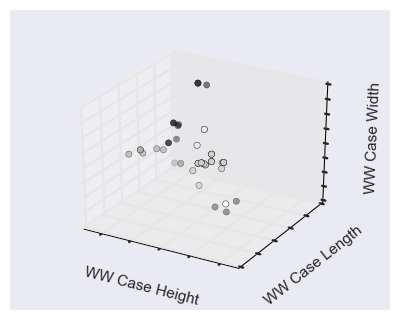

In [18]:
fignum = 1 

fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = Axes3D(fig, rect=[0, 0, .95, 1])
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('WW Case Height')
ax.set_ylabel('WW Case Length')
ax.set_zlabel('WW Case Width')
# ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1



In [19]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    y_train_pred = estimator.predict(X_train)

## Understanding the data

### Mismatch of items

In comparing the unique "WRIN PREFIX", the following items are missing from "DC Volumes" and "Xtab-Temp Zone X WRIN" sheets.
1. 00042-DIET COKE SYRUP - with 152,368 cases received
2. 00168-SPRITE DRINK SYRUP - with 142,032 cases received

Both the WRIN PREFIX has temperature zone as Dry with the same Supplier "COCA-COLA COMPANY (THE)/MCDONALDS ACCOUNT GROUP". Adding these two tiems in the "Xtab-Temp Zone X WRIN" sheet will change the rank of other items.

In [20]:
temperature = ('F', 'R', 'D')
for i in temperature:
    print("Temp zone", i ,"missing:",set(DC_Volume['Wrin Prefix'][DC_Volume['Wrin Temp Zone'] == i].unique()).symmetric_difference(set(items['Wrin Prefix'][items[i].notnull()].unique())))

Temp zone F missing: set()
Temp zone R missing: set()
Temp zone D missing: {'00042-DIET COKE SYRUP', '00168-SPRITE DRINK SYRUP'}


In [21]:
print("Total number of items manufactured and distributed:",len(DC_Volume['Wrin Prefix'].unique()), "items")
print("Number of DCs:", DC_Volume['DC ID'].unique())
print("Total number of suppliers:",len(DC_Volume['Supplier Parent Name'].unique()))
print("Freezer items:",len(DC_Volume['Wrin Prefix'][DC_Volume['Wrin Temp Zone'] == "F"].unique()))
print("Dry items:",len(DC_Volume['Wrin Prefix'][DC_Volume['Wrin Temp Zone'] == "D"].unique()))
print("Refrigerator items:",len(DC_Volume['Wrin Prefix'][DC_Volume['Wrin Temp Zone'] == "R"].unique()))

Total number of items manufactured and distributed: 125 items
Number of DCs: [ 7 15 99]
Total number of suppliers: 80
Freezer items: 25
Dry items: 61
Refrigerator items: 40


### Wrong Temperature Zone

"LOPEZ FOOD INC" is the only Supplier to pack Beef patty in Temp Zone "R" and sent 105 cases in total. They are also responsible for sending "Canadian Bacon/Natural juice" in Temp Zone "R"

In [22]:
DC_Volume[(DC_Volume['Wrin Prefix']=='00006-4/1 BEEF PATTY') & (DC_Volume['Wrin Temp Zone']=='R')]

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,WW Pallet TI x HI,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID
11,LOPEZ FOODS INC,14654,10,00006-4/1 BEEF PATTY,00006417-BEEF PATTY/4:1/FRESH,R,4.38,18.19,12.68,LB,7.00 x 13.00,17.86,18.19 x 12.68 x 4.38,99
12,LOPEZ FOODS INC,14654,95,00006-4/1 BEEF PATTY,00006432-BEEF PATTY/4:1/FRESH,R,4.38,18.19,12.69,LB,7.00 x 14.00,17.56,18.19 x 12.69 x 4.38,99


Find the most number of cases sent by a supplier

Why is 1 item measured in KG but the gross weight in LBS. is this typo error?

Check what all items goes to each DCs

### Basic visualization

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


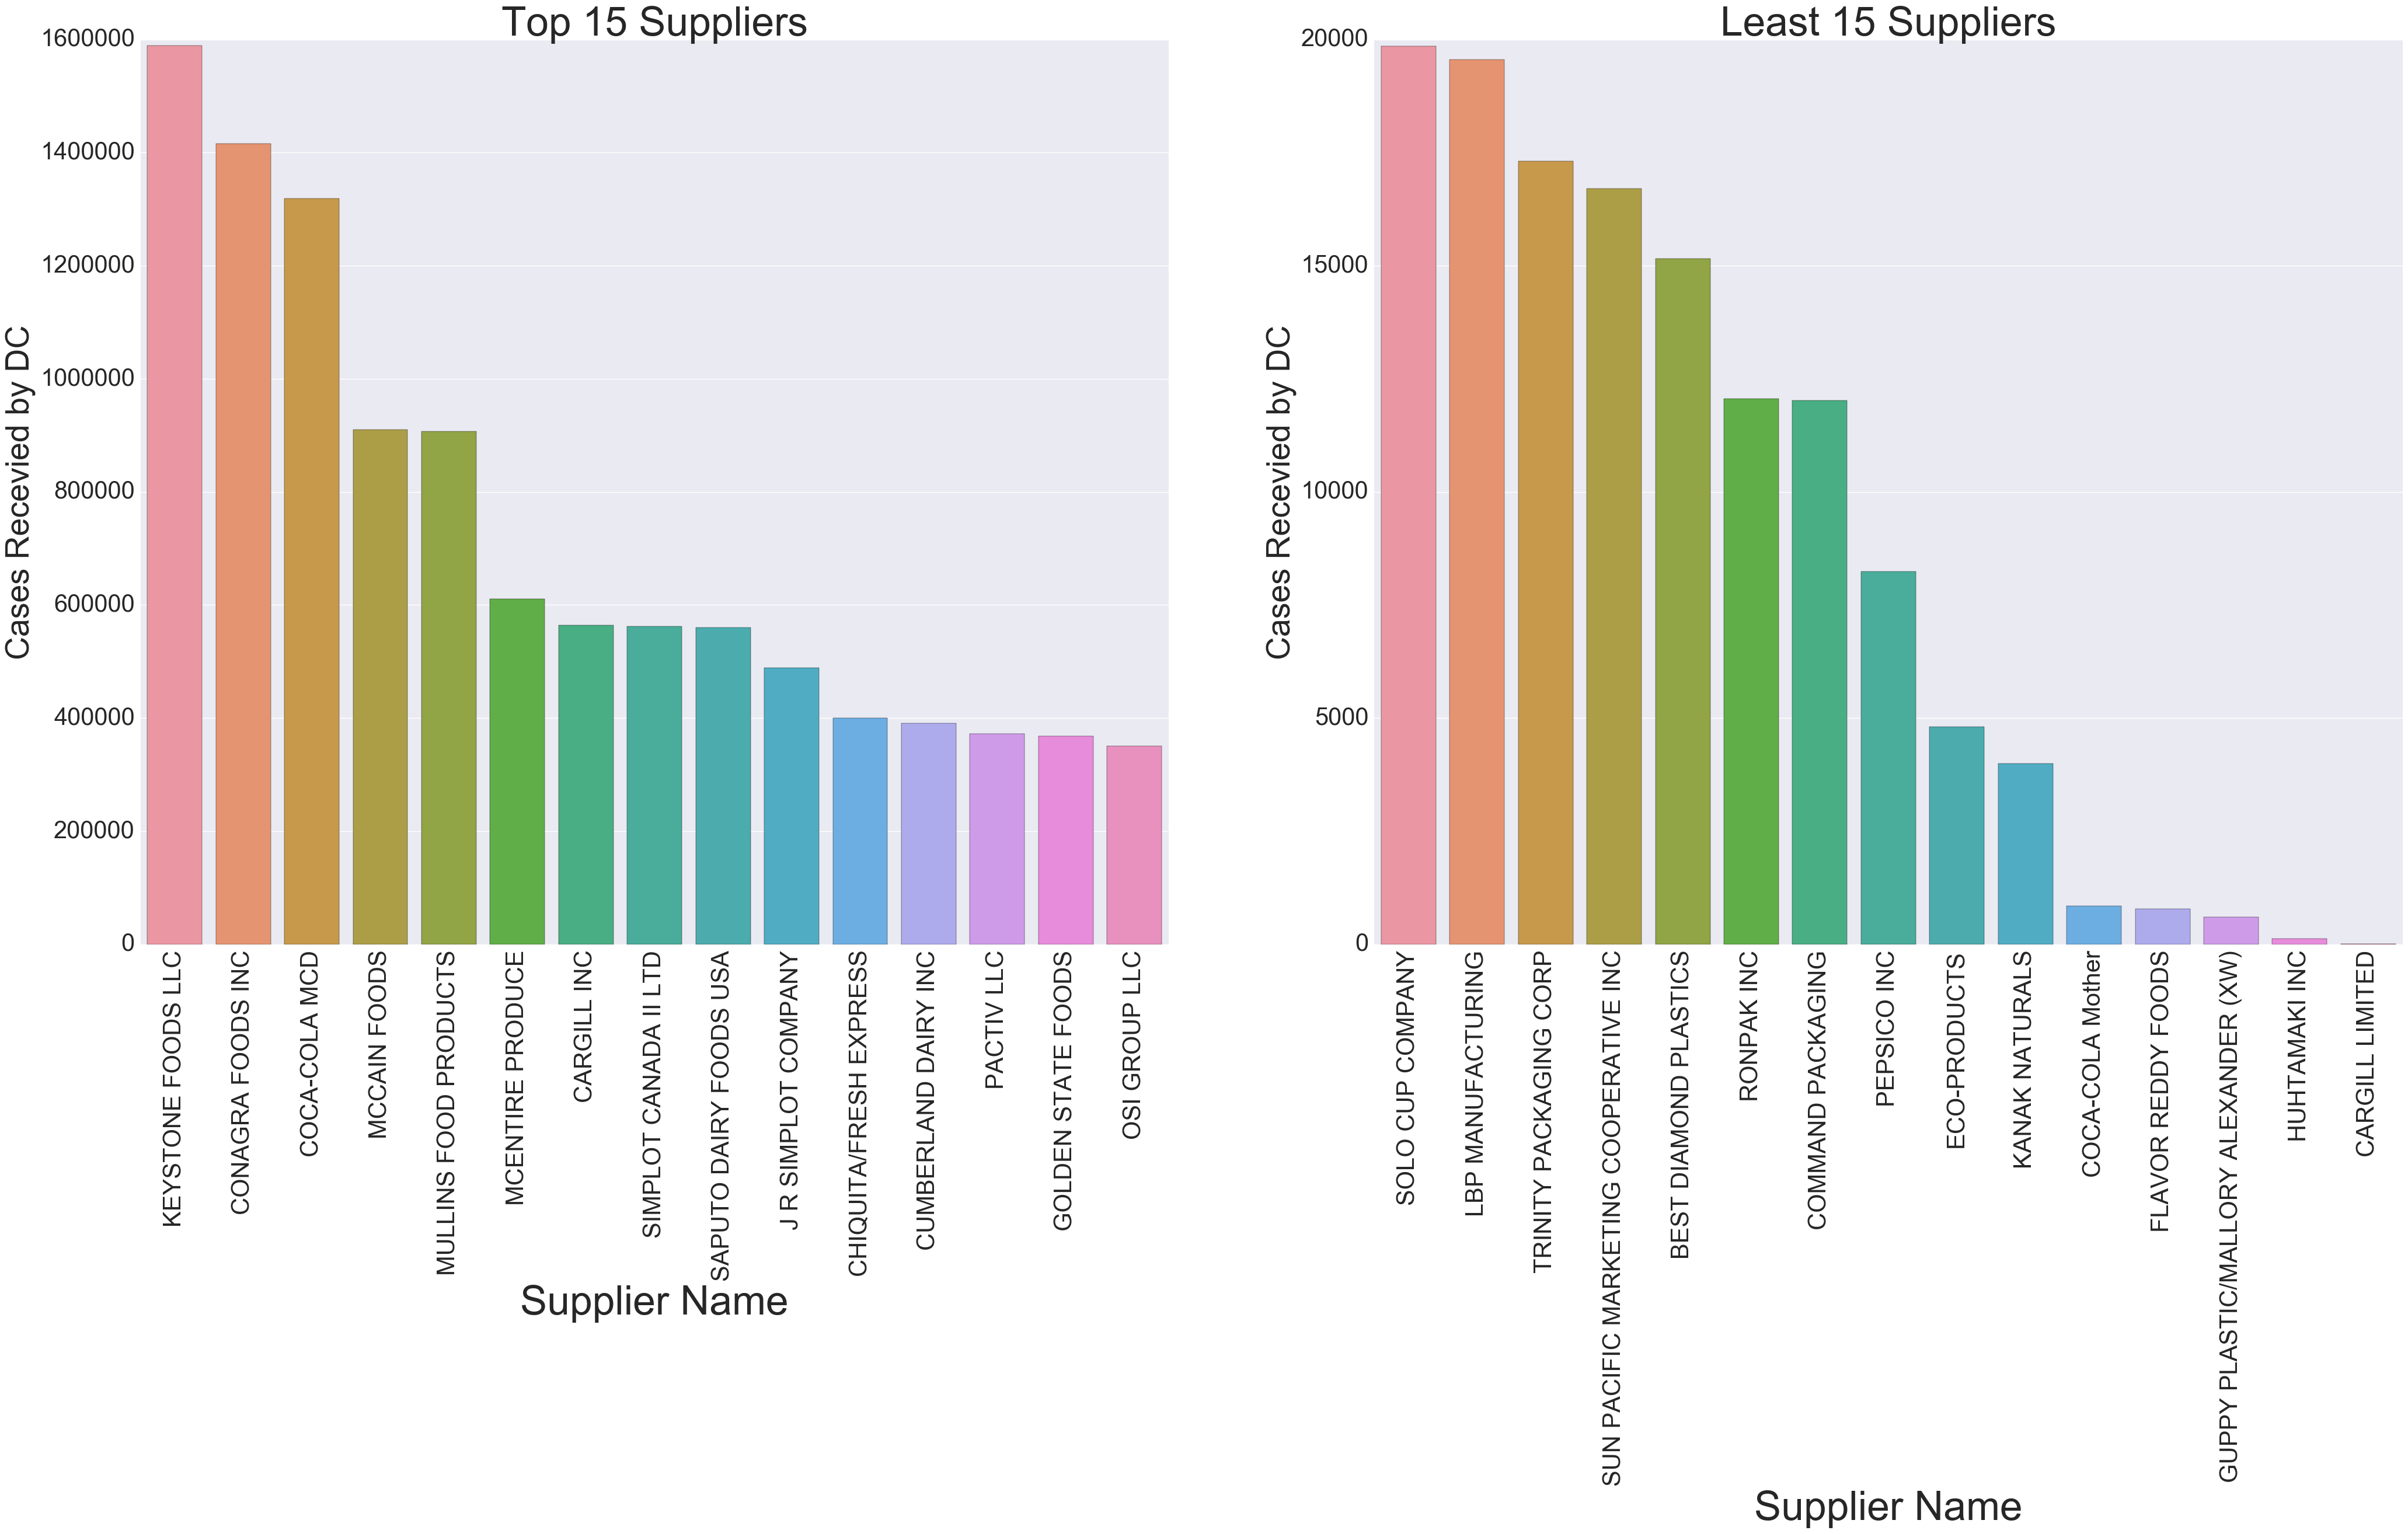

In [23]:
#Top and least suppliers for Mcdonalds
#plt.figure()

plt.figure(figsize=(50,20))
plt.subplot(121)

df = DC_Volume[['Supplier Parent Name','DC Receipts Cases Received']]
df['Supplier Parent Name']=df['Supplier Parent Name'].replace(['COCA-COLA COMPANY (THE)/MCDONALDS ACCOUNT GROUP'],value='COCA-COLA MCD')
df['Supplier Parent Name']=df['Supplier Parent Name'].replace(['COCA-COLA COMPANY (THE)/MOTHER PARKERS FOODS LTD'],value='COCA-COLA Mother')
grouped = df.groupby(df['Supplier Parent Name']).sum().reset_index()
grouped = grouped.sort_values('DC Receipts Cases Received', ascending = False)
sns.barplot(grouped['Supplier Parent Name'][:15], grouped['DC Receipts Cases Received'][:15])
plt.title("Top 15 Suppliers",size=50)
plt.ylabel("Cases Recevied by DC",size=40)
plt.xticks(rotation=90,size=30)
plt.yticks(size=30)
plt.xlabel('Supplier Name',size=50)

plt.subplot(122)
sns.barplot(grouped['Supplier Parent Name'][-15:], grouped['DC Receipts Cases Received'][-15:])
plt.title("Least 15 Suppliers",size=50)
plt.ylabel("Cases Recevied by DC",size=40)
plt.xticks(rotation=90,size=30)
plt.yticks(size=30)
plt.xlabel('Supplier Name',size=50)
plt.show()


# DC outbound

In [24]:
df_outbound = pd.read_excel(loca_path+"DC Sales_DC7.xlsx")

In [25]:
df_outbound.head(1)

,Reporting Day,Rest ID,DC Description,Wrin Prefix,Wrin Description,DC Sales Cases Shipped
0,2017-08-02,40,00007-MANASSAS-M-B,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,24


In [26]:
len(df_outbound['Rest ID'].unique())

521